## Stock Price Technical Analysis & Financial Metrics for GOOG
1. Introduction & Setup
Objective: This analysis aims to evaluate historical stock price trends using quantitative technical indicators and financial metrics. We will utilize TA-Lib for signal generation (RSI, MACD) and PyNance for risk metrics.

In [1]:
import os
import sys
import warnings
import pandas as pd
import yfinance as yf  # Helper to fetch fresh data if CSV is missing

# Add 'scripts' directory to path to allow importing custom modules
sys.path.insert(0, os.path.dirname(os.getcwd()))

# Import Custom Scripts
from scripts.data_loader import DataLoader
from scripts.stock_analysis import TechnicalAnalyzer, StockVisualizer

# Configuration
warnings.filterwarnings('ignore')
DATA_PATH = '../data/yfinance_data/GOOG.csv'
TICKER = 'GOOG'

print("✅ Libraries and Custom Scripts Loaded.")

✅ Libraries and Custom Scripts Loaded.


#### 2. Data Loading and Preparation
We use the DataLoader class to get the raw stock data. Since technical analysis requires specific columns (Open, High, Low, Close, Volume), we ensure the data is formatted correctly.


In [2]:

# Ensure the file exists
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"❌ Data file not found at: {DATA_PATH}")

# Use your existing loader
loader = DataLoader()
stock_df = loader.load_data(DATA_PATH)

# Verify OHLCV data loaded correctly
print(f"Loaded Data Shape: {stock_df.shape}")
print(stock_df.head())


Loaded Data Shape: (3774, 6)
         Date     Close      High       Low      Open     Volume
0  2009-01-02  7.948608  7.960977  7.557264  7.633949  144961322
1  2009-01-05  8.115089  8.194003  7.792268  7.940692  196293007
2  2009-01-06  8.263762  8.430492  8.074027  8.237046  257971329
3  2009-01-07  7.965677  8.185839  7.885034  8.121770  180453860
4  2009-01-08  8.044340  8.044340  7.850152  7.873406  144567852


### 3. Technical Analysis with TA-Lib
In this section, we initialize the TechnicalAnalyzer class. This encapsulates the logic for applying complex mathematical indicators to the dataframe.

Indicators Applied:

SMA (Simple Moving Average): We calculate the 20-day (short-term) and 50-day (medium-term) averages to identify trend direction.

RSI (Relative Strength Index): Measures momentum to identify overbought (>70) or oversold (<30) conditions.

MACD (Moving Average Convergence Divergence): A trend-following momentum indicator that shows the relationship between two moving averages of a stock's price.

In [3]:
# Initialize the analyzer with the dataframe
analyzer = TechnicalAnalyzer(stock_df)

# Apply the indicators (SMA, RSI, MACD)
# This modifies the internal dataframe and returns the result
df_analyzed = analyzer.apply_talib_indicators()

# Preview the new technical columns
cols_to_show = ['Close', 'SMA_20', 'SMA_50', 'RSI', 'MACD']
print(df_analyzed[cols_to_show].tail())

[INFO] Calculating TA-Lib technical indicators...
[INFO] Indicators added: SMA_20, SMA_50, RSI, MACD components.
                 Close      SMA_20      SMA_50        RSI      MACD
Date                                                               
2023-12-22  141.750000  135.009596  133.914786  64.953309  1.412015
2023-12-26  141.849304  135.246477  133.999010  65.115870  1.706565
2023-12-27  140.478683  135.386520  134.017881  60.916026  1.808553
2023-12-28  140.319748  135.628861  134.023641  60.429303  1.855168
2023-12-29  139.972137  135.976979  134.056417  59.313063  1.842820


### 4. Financial Metrics with PyNance
We move beyond price trends to analyze risk and return using PyNance. This library is specialized for retrieving and analyzing financial data.

Metrics Calculated:

Volatility: The degree of variation of a trading price series over time.

Sharpe Ratio: The average return earned in excess of the risk-free rate per unit of volatility (a measure of risk-adjusted return).

In [13]:
# Calculate key financial metrics
financial_metrics = analyzer.calculate_financial_metrics()

# Display results in a more readable format
print("Financial Metrics Summary")
print("-" * 50)
print(f"Volatility (Annualized): {financial_metrics['volatility']*100:.2f}%")
print(f"Sharpe Ratio: {financial_metrics['sharpe_ratio']:.2f}")
print(f"Maximum Drawdown: {financial_metrics['max_drawdown']*100:.2f}%")
print(f"Total Return: {financial_metrics['total_return']*100:.2f}%")


Financial Metrics Summary
--------------------------------------------------
Volatility (Annualized): 27.52%
Sharpe Ratio: 0.80
Maximum Drawdown: -44.60%
Total Return: 1660.96%


### 5. Visualization
Finally, we use the StockVisualizer class to interpret the data visually. Charts are essential for spotting entry/exit points that raw numbers might miss.

#### A. Price Trend & Moving Averages

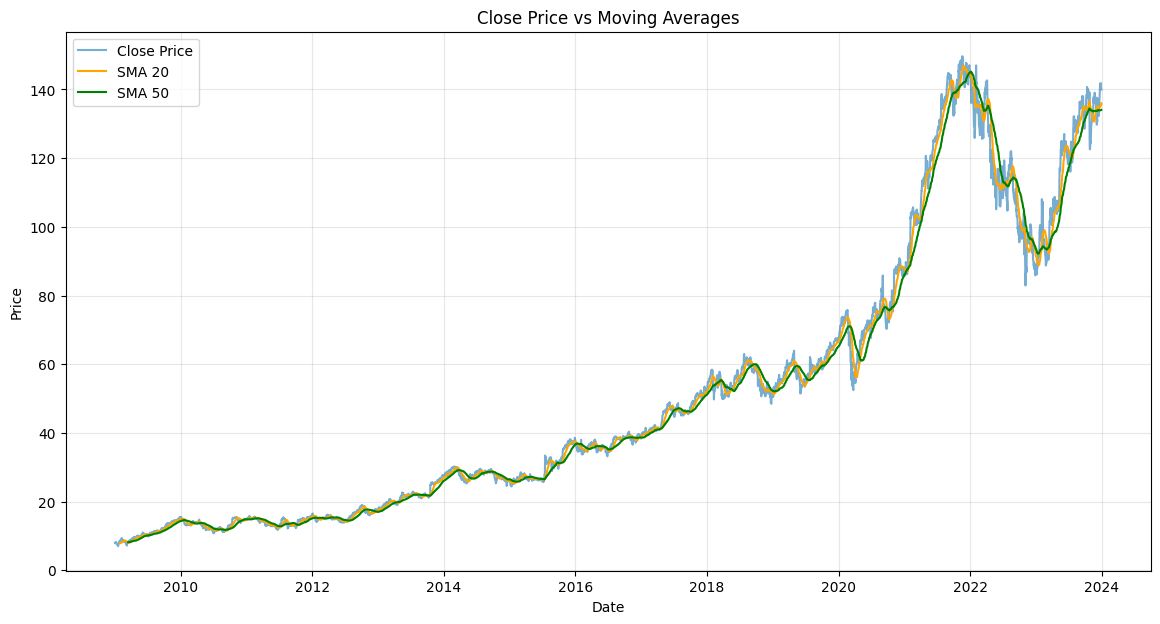

In [5]:
viz = StockVisualizer(df_analyzed)
viz.plot_price_and_ma()

#### B. Momentum (RSI)
This plot helps identify potential reversal points.

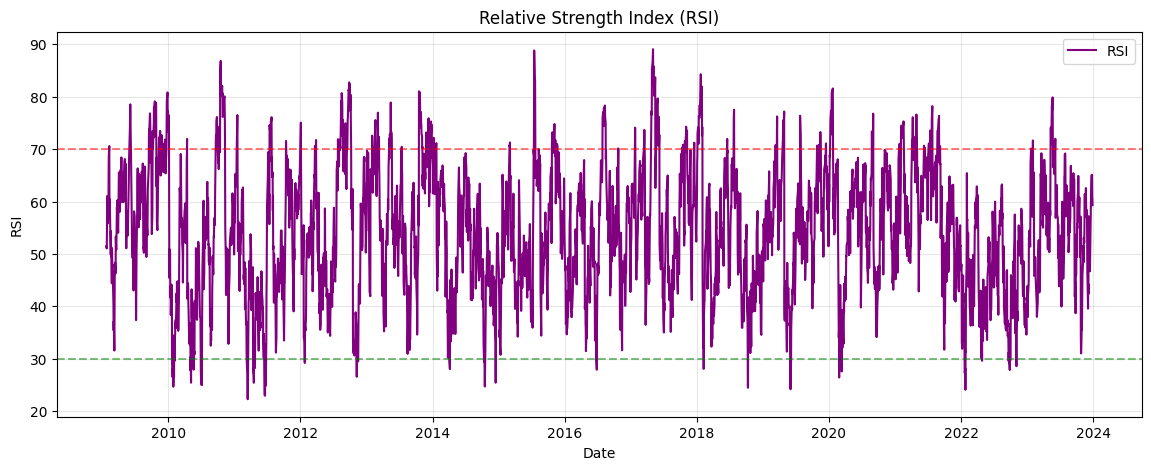

In [6]:
viz.plot_rsi()

#### C. Trend Strength (MACD)
This visualizes the convergence and divergence of the moving averages, providing buy/sell signals.

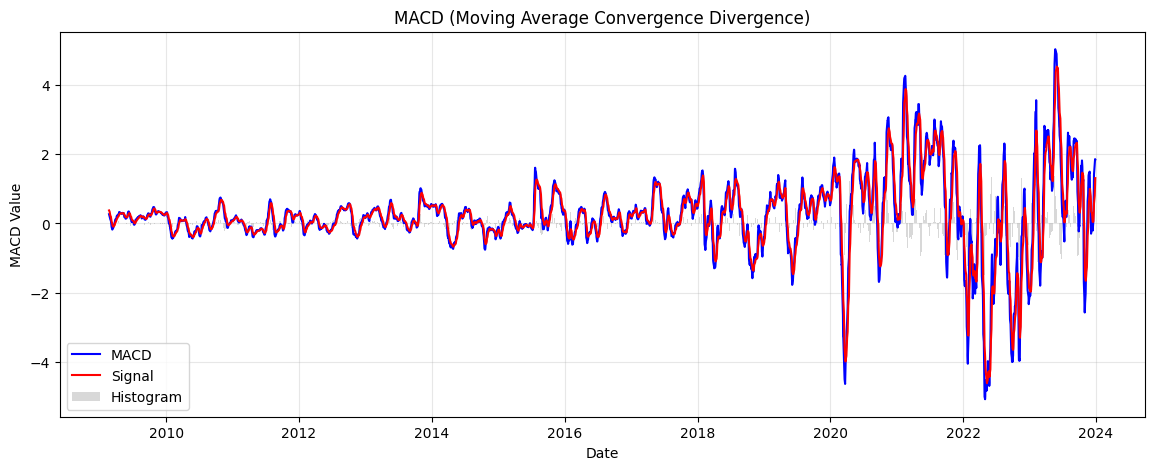

In [7]:
viz.plot_macd()

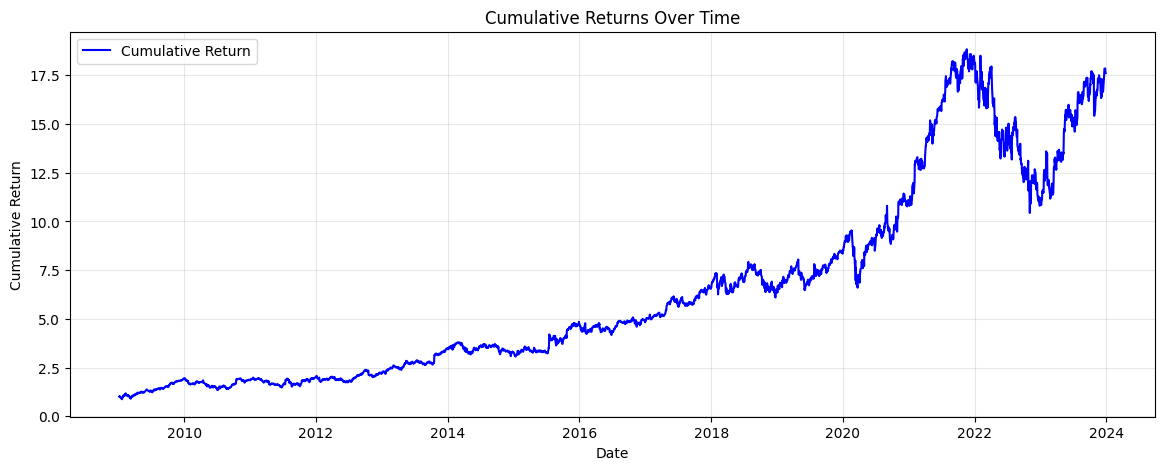

In [8]:
viz.plot_cumulative_returns()

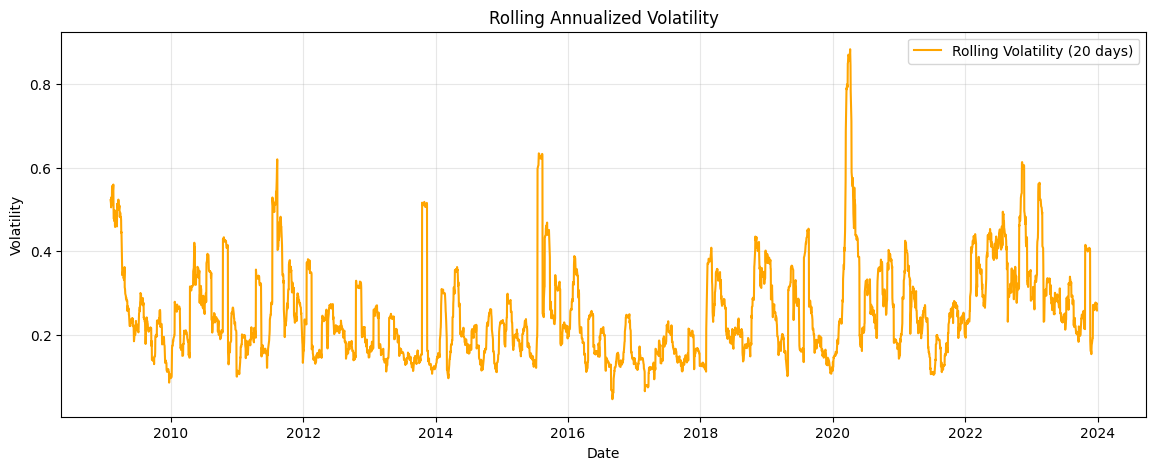

In [9]:
viz.plot_rolling_volatility()